In [91]:
# Import for the whole program
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import numpy.random as npr
import scipy

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

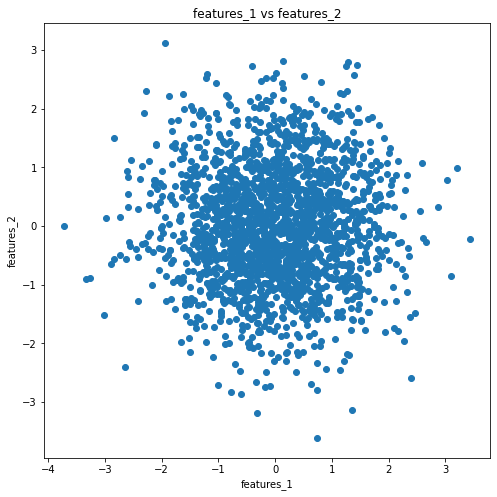

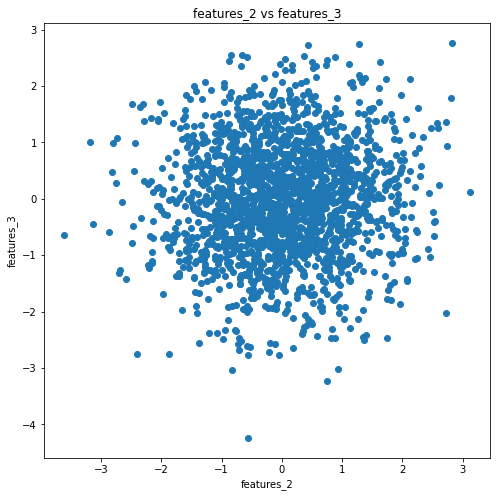

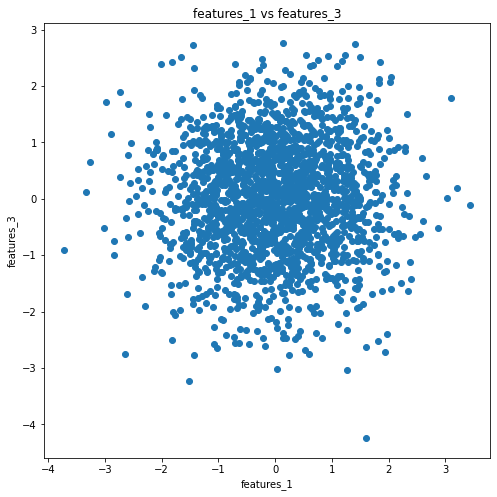

In [2]:
df = pd.read_csv('Es7Files/regression_generated.csv')
#print(df)
X = df.features_1
Y = df.features_2
Z = df.features_3

fig1 = plt.figure(num="Figure 1", figsize=(8, 8))
plt.scatter(X, Y)
plt.title('features_1 vs features_2')
plt.xlabel("features_1")
plt.ylabel("features_2")
plt.show()

fig2 = plt.figure(num="Figure 2", figsize=(8, 8))
plt.scatter(Y, Z)
plt.title('features_2 vs features_3')
plt.xlabel("features_2")
plt.ylabel("features_3")
plt.show()

fig3 = plt.figure(num="Figure 3", figsize=(8, 8))
plt.scatter(X, Z)
plt.title('features_1 vs features_3')
plt.xlabel("features_1")
plt.ylabel("features_3")
plt.show()

#ANS: there is no correlation beetween them


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

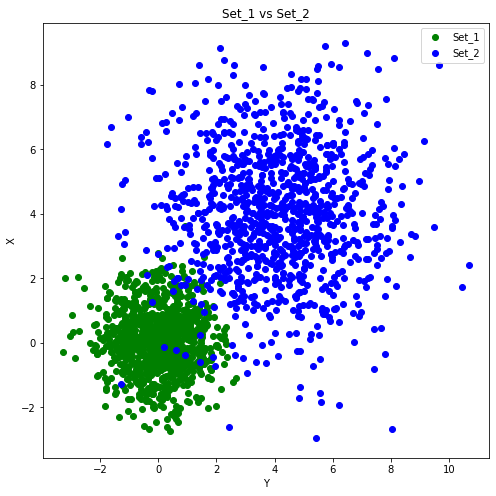

In [3]:
# vector of normal distributed elemnts
mu1, sigma1, size1 = 0, 1, 1000 # mean and standard deviation size
s1_x = np.random.normal(mu1, sigma1, size1)
s1_y = np.random.normal(mu1, sigma1, size1)
mu2, sigma2, size2 = 4, 2, 1000 # mean and standard deviation size
s2_x = np.random.normal(mu2, sigma2, size2)
s2_y = np.random.normal(mu2, sigma2, size2)

fig4 = plt.figure(num="Figure 4", figsize=(8, 8))
plt.scatter(s1_x, s1_y, color="green")
plt.scatter(s2_x, s2_y, color="blue")
plt.title('Set_1 vs Set_2')
plt.xlabel("Y")
plt.ylabel("X")
plt.legend(["Set_1", "Set_2"])
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

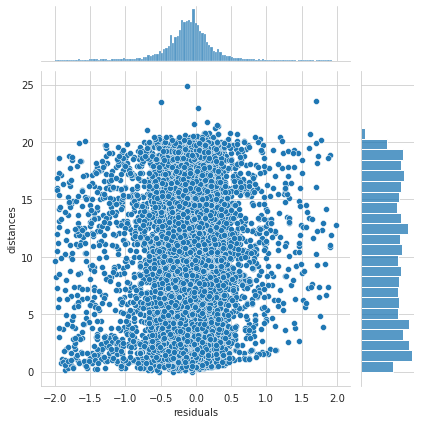

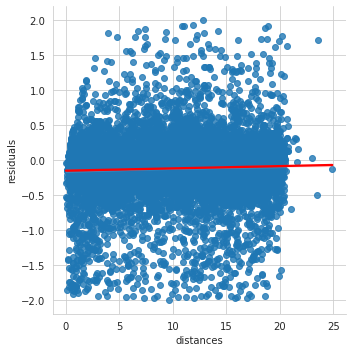

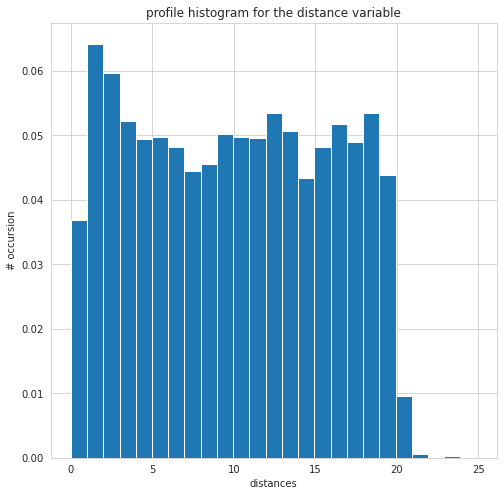

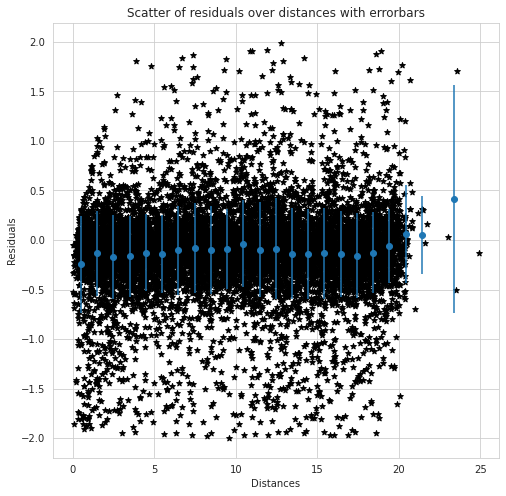

In [9]:
# Read the pkl file
data = pd.read_pickle('Es7Files/residuals_261.pkl').tolist()
#print(type(data))
# Convert to data Frame
df = pd.DataFrame(data)
#print(df)
# filter the entries (rows) with the absolute values of the variable "residual" smaller than 2
df = df[ abs(df['residuals']) < 2]
#print(df)

# print the seaborn
import seaborn as sns

sns.jointplot(x="residuals", y="distances", data = df)
#plt.show()

# Linear regression
sns.set_style('whitegrid')
sns.lmplot(y ='residuals', x ='distances', data = df, line_kws={'color': 'red'})
plt.show()

# Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
fig7 = plt.figure(num="Figure 7", figsize=(8, 8))
n, bins, _ = plt.hist(df['distances'], bins=25, density=True, cumulative=False)
# Returned: n -> values of the bins
#		 bins -> edges of the bins 
plt.title('profile histogram for the distance variable')
plt.xlabel("distances")
plt.ylabel("# occursion")
plt.show()
#print(n)
#print(bins)
x = np.fromfunction(lambda i, j: bins[i]+(bins[i+1]-bins[i])/2, (len(bins)-1, 1), dtype=int)

# define lamda functio for computing y
h_med = lambda i, j: df['residuals'].loc[(df['distances'] >= bins[i]) & (df['distances'] < bins[i+1])].mean()
h_std = lambda i, j: df['residuals'].loc[(df['distances'] >= bins[i]) & (df['distances'] < bins[i+1])].std()
#print(h_med(0, 0))
'''
# Would be better using from function, but ha sthe problem of the  nan values
y = np.fromfunction(h, (len(bins)-1, 1), dtype=int)
print(y)
'''
# Compute the y using h_med function
y = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
	y[i] = h_med(i, 0)
	#print(h_med(i, 0))

# Compute the y_err using h_std function
y_err = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
	y_err[i] = h_std(i, 0)
	#print(h_std(i, 0))

fig8 = plt.figure(num="Figure 8", figsize=(8, 8))
plt.scatter(x=df['distances'],y=df['residuals'],marker='*',color='black')
plt.errorbar(x, y, yerr=y_err,fmt='o')
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Scatter of residuals over distances with errorbars')
plt.show()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


/tmp/ipykernel_2209/4280308313.py:27: RuntimeWarning: divide by zero encountered in true_divide
  err = 1/np.sqrt(h) #Poisson uncertainty


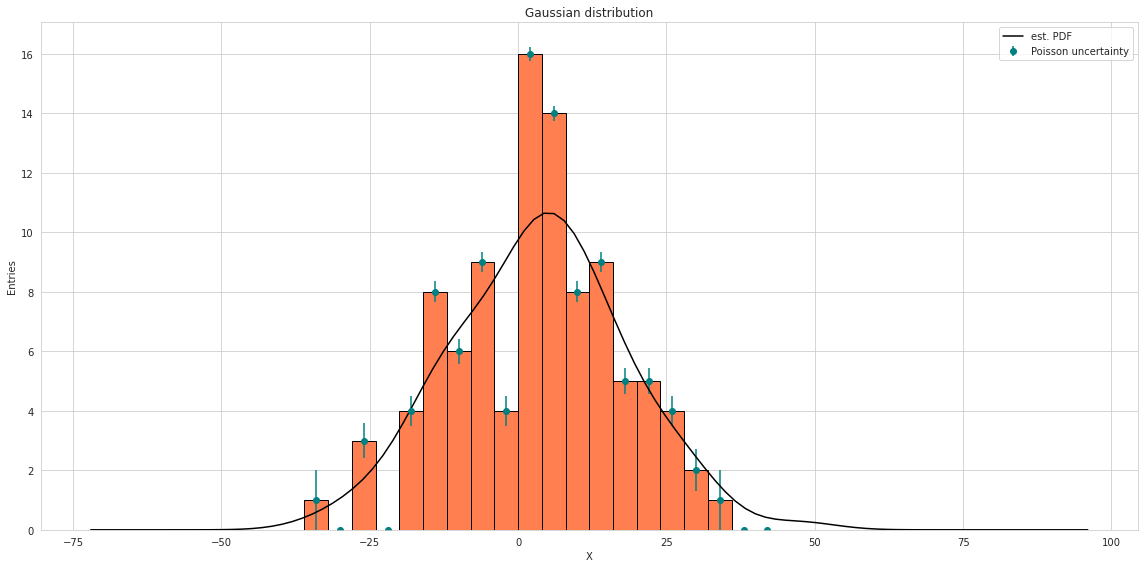

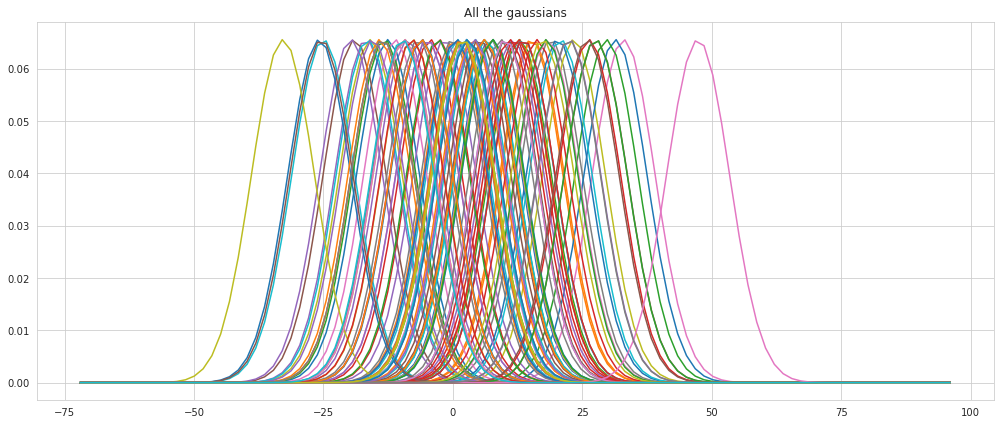

In [95]:
def closest_multiple(multiple, number):
    sign = np.sign(number)
    factor = sign*math.ceil(number/multiple*sign)
    return int(factor*multiple)



N = 100
mean = 3
std = 14
x = np.random.normal(mean,std,N)

#set the bins
multiple = 4
upper_end = closest_multiple(multiple,x.max())
lower_end = closest_multiple(multiple,x.min())

bins = [x for x in range(lower_end,upper_end,multiple)]

#plot the histogram
fig1 = plt.figure(figsize=(16, 8))
h, bins, _ = plt.hist(x, bins = bins,edgecolor = "black", color ='coral')
ax = fig1.axes[0]

#error bar
bin_center = 0.5*(bins[1:] + bins[:-1])
err = 1/np.sqrt(h) #Poisson uncertainty
ax.errorbar(bin_center, h, yerr=err, fmt='o', c='teal',label= "Poisson uncertainty")


#create a gaussian for every element of x
s = 100
ascissa, step = np.linspace(lower_end*2,upper_end*2,s,retstep=True)
std = 1.06 * np.std(x) * (len(x)**(-1./5))


x_i = []
for i in range(len(x)):  
    gaussian = scipy.stats.norm.pdf(ascissa, x[i], std)
    x_i.append(gaussian)





#plot all the gaussian
fig2, ax2 = plt.subplots(figsize=(14, 6))
for i in range(len(x_i)):
    ax2.plot(ascissa,x_i[i])

#sum of all the gaussian in the vector
x_i = np.array(x_i)
x_i = np.sum(x_i,axis=0)

#integ
integ_x_i = scipy.integrate.trapezoid(x_i,dx = step)
integ_histogram = np.sum(multiple*h)
factor = integ_histogram/integ_x_i
ax.plot(ascissa,x_i*factor, label = "est. PDF", color = "black")


# fig up
ax.set_title('Gaussian distribution')
ax.set_xlabel('X')
ax.set_ylabel('Entries')

# fig above
ax2.set_title('All the gaussians')


#plotting
ax.legend()
fig1.tight_layout()    
fig2.tight_layout()